In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv("./student/student-por.csv", sep=";")  # Adjust delimiter if necessary

# Select features and target variable
X = data.drop(columns=["G3"])  # 'G3' is the final grade (target variable)
y = data["G3"]

# One-hot encode categorical features
X = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Build the ANN model
model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),
    Dense(32, activation='relu'),
    Dense(1)  # Single output for regression
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/50
17/17 [==============================] - 1s 12ms/step - loss: 123.2277 - mae: 10.6196 - val_loss: 109.9138 - val_mae: 10.0785
Epoch 2/50
17/17 [==============================] - 0s 3ms/step - loss: 84.3100 - mae: 8.7251 - val_loss: 67.3918 - val_mae: 7.7659
Epoch 3/50
17/17 [==============================] - 0s 2ms/step - loss: 47.3087 - mae: 6.3539 - val_loss: 29.7090 - val_mae: 4.8176
Epoch 4/50
17/17 [==============================] - 0s 2ms/step - loss: 19.3356 - mae: 3.8115 - val_loss: 11.2993 - val_mae: 2.7108
Epoch 5/50
17/17 [==============================] - 0s 3ms/step - loss: 8.6193 - mae: 2.3121 - val_loss: 8.3333 - val_mae: 2.2863
Epoch 6/50
17/17 [==============================] - 0s 2ms/step - loss: 6.4193 - mae: 1.9228 - val_loss: 6.3167 - val_mae: 1.9693
Epoch 7/50
17/17 [==============================] - 0s 3ms/step - loss: 5.0792 - mae: 1.6887 - val_loss: 5.1642 - val_mae: 1.7477
Epoch 8/50
17/17 [==============================] - 0s 2ms/step - loss: 4.320

In [7]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Train the Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Evaluate the model
y_pred = dt_model.predict(X_test)
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))
print("MAE:", mean_absolute_error(y_test, y_pred))


RMSE: 1.6478424121816428
MAE: 0.9153846153846154


c:\Users\Paul\anaconda3\envs\AI-env\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


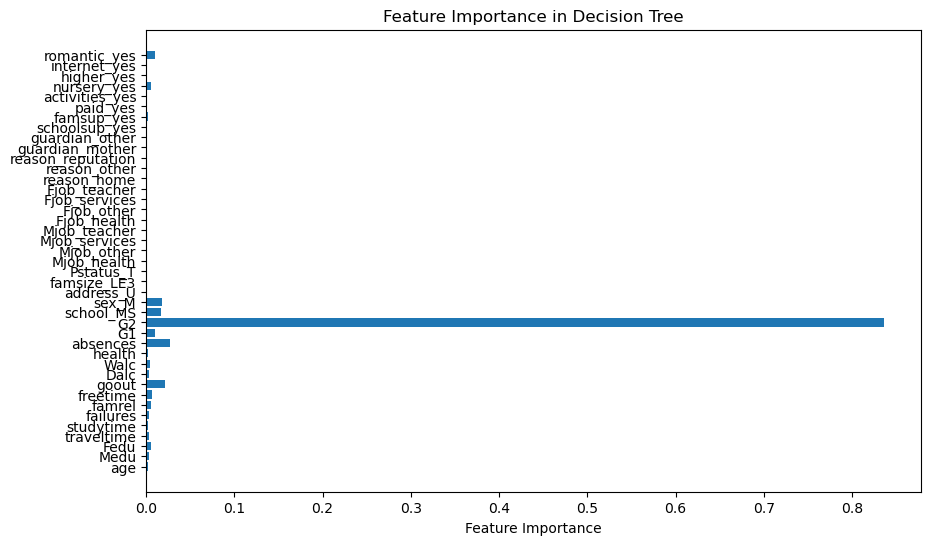

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importance
feature_importances = dt_model.feature_importances_

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(np.arange(len(feature_importances)), feature_importances, align='center')
plt.yticks(np.arange(len(feature_importances)), X.columns)
plt.xlabel("Feature Importance")
plt.title("Feature Importance in Decision Tree")
plt.show()


c:\Users\Paul\anaconda3\envs\AI-env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


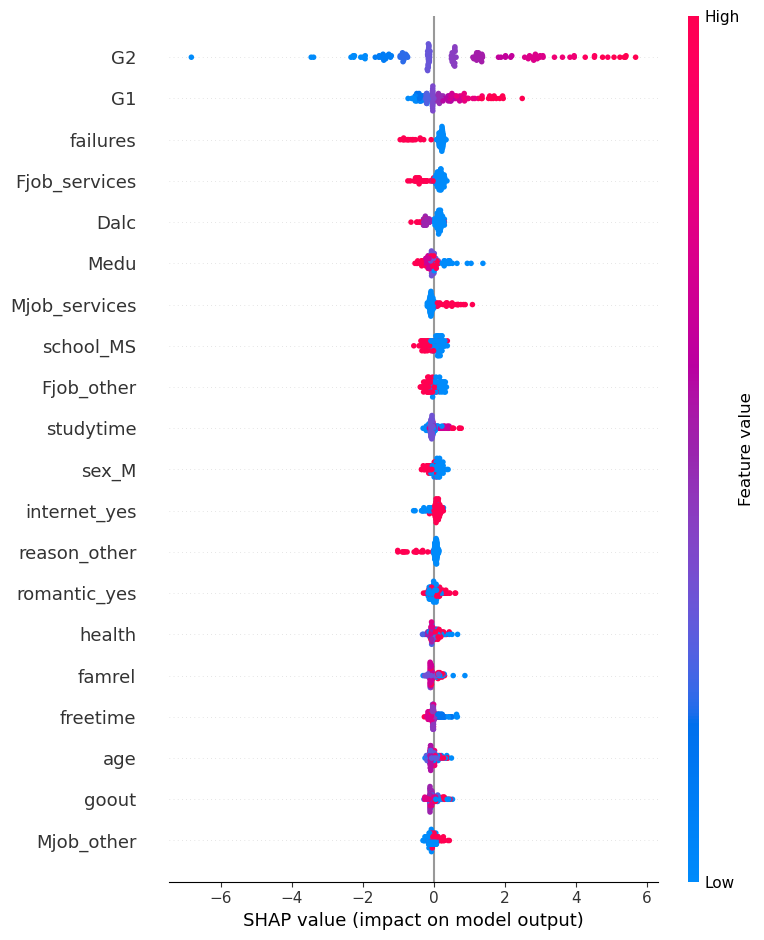

In [10]:
import shap

# Initialize SHAP explainer
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test, feature_names=X.columns)


In [11]:
from tensorflow.keras.optimizers import Adam

# Experiment with different learning rates
learning_rates = [0.001, 0.0005, 0.01]
for lr in learning_rates:
    model.compile(optimizer=Adam(learning_rate=lr), loss='mean_squared_error', metrics=['mae'])
    model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/50
17/17 [==============================] - 0s 12ms/step - loss: 0.6295 - mae: 0.5766 - val_loss: 2.7737 - val_mae: 1.1950
Epoch 2/50
17/17 [==============================] - 0s 5ms/step - loss: 0.5347 - mae: 0.5379 - val_loss: 2.6695 - val_mae: 1.1950
Epoch 3/50
17/17 [==============================] - 0s 3ms/step - loss: 0.4784 - mae: 0.5095 - val_loss: 2.6247 - val_mae: 1.1763
Epoch 4/50
17/17 [==============================] - 0s 3ms/step - loss: 0.4399 - mae: 0.4770 - val_loss: 2.6559 - val_mae: 1.2043
Epoch 5/50
17/17 [==============================] - 0s 3ms/step - loss: 0.4138 - mae: 0.4731 - val_loss: 2.7102 - val_mae: 1.2060
Epoch 6/50
17/17 [==============================] - 0s 3ms/step - loss: 0.3892 - mae: 0.4581 - val_loss: 2.7718 - val_mae: 1.2129
Epoch 7/50
17/17 [==============================] - 0s 3ms/step - loss: 0.3573 - mae: 0.4471 - val_loss: 2.7571 - val_mae: 1.2223
Epoch 8/50
17/17 [==============================] - 0s 3ms/step - loss: 0.3171 - mae: 0.4

In [12]:
# Modify the architecture
model = Sequential([
    Dense(128, activation='relu', input_dim=X_train.shape[1]),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile and train the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])
model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))


Epoch 1/50
33/33 [==============================] - 1s 7ms/step - loss: 90.3270 - mae: 8.7242 - val_loss: 17.8288 - val_mae: 3.4613
Epoch 2/50
33/33 [==============================] - 0s 2ms/step - loss: 11.7210 - mae: 2.5061 - val_loss: 5.2865 - val_mae: 1.7885
Epoch 3/50
33/33 [==============================] - 0s 2ms/step - loss: 4.5017 - mae: 1.5358 - val_loss: 3.7039 - val_mae: 1.4083
Epoch 4/50
33/33 [==============================] - 0s 2ms/step - loss: 3.2754 - mae: 1.2668 - val_loss: 2.9787 - val_mae: 1.2357
Epoch 5/50
33/33 [==============================] - 0s 2ms/step - loss: 2.7264 - mae: 1.1459 - val_loss: 2.9195 - val_mae: 1.2033
Epoch 6/50
33/33 [==============================] - 0s 2ms/step - loss: 2.3328 - mae: 1.0772 - val_loss: 2.8831 - val_mae: 1.1951
Epoch 7/50
33/33 [==============================] - 0s 2ms/step - loss: 2.0299 - mae: 1.0042 - val_loss: 2.6586 - val_mae: 1.1486
Epoch 8/50
33/33 [==============================] - 0s 2ms/step - loss: 1.8299 - mae: 0

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

# Define hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search
dt_model = DecisionTreeRegressor(random_state=42)
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters and train the model
best_params = grid_search.best_params_
print("Best parameters:", best_params)

# Train Decision Tree with optimal hyperparameters
optimized_dt_model = DecisionTreeRegressor(**best_params)
optimized_dt_model.fit(X_train, y_train)


Best parameters: {'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2}


DecisionTreeRegressor(max_depth=3, min_samples_leaf=2)

In [14]:
# Predict and evaluate ANN
y_pred_ann = model.predict(X_test)
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

rmse_ann = mean_squared_error(y_test, y_pred_ann, squared=False)
mae_ann = mean_absolute_error(y_test, y_pred_ann)
r2_ann = r2_score(y_test, y_pred_ann)

print("ANN Performance:")
print("RMSE:", rmse_ann)
print("MAE:", mae_ann)
print("R²:", r2_ann)


5/5 [==============================] - 0s 1ms/step
ANN Performance:
RMSE: 1.7022561166709942
MAE: 1.246748320872967
R²: 0.7028547525405884


c:\Users\Paul\anaconda3\envs\AI-env\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [15]:
# Predict and evaluate Decision Tree
y_pred_dt = optimized_dt_model.predict(X_test)

rmse_dt = mean_squared_error(y_test, y_pred_dt, squared=False)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("Decision Tree Performance:")
print("RMSE:", rmse_dt)
print("MAE:", mae_dt)
print("R²:", r2_dt)


Decision Tree Performance:
RMSE: 1.3886391985305684
MAE: 0.791194122266997
R²: 0.8022585124119805


c:\Users\Paul\anaconda3\envs\AI-env\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


- decision tree is better since RSME and MAE is lower and R^2 is higher

In [16]:
import joblib

# Save the Decision Tree model
joblib.dump(optimized_dt_model, "decision_tree_model.pkl")

['decision_tree_model.pkl']

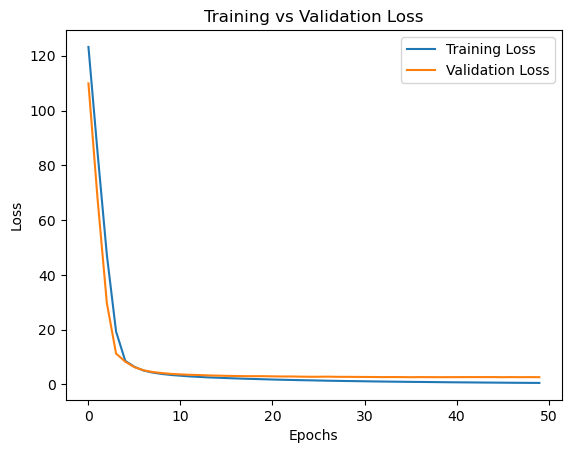

In [17]:
import matplotlib.pyplot as plt

# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()
